<a href="https://colab.research.google.com/github/Anfloe/Comp472-Project/blob/main/Implementation_Comp472_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Using Naive Bayes, Decision Trees, MLP, and CNN on CIFAR-10 Dataset.







This project focuses on performing image classifica-tion on the CIFAR-10 dataset using four models: Naïve Bayes (NB), Decision Tree (DT), Multilayer Perceptron (MLP), and Convolutional Neural Net-work (CNN).

Feature extraction using ResNet-18 and Principal Component Analysis (PCA) was a key step for the NB, DT, and MLP models.

 A primary challenge encountered during the project was the computational limitations of the Google Colab Pro environment, particularly with memory usage when processing large images and batch sizes.

 To address this, compromises were made, including using smaller images to allow larger batch sizes and tuning a limited set of hyperparameters. These adjust-ments balanced resource constraints with achieving meaningful results. Detailed findings and insights are provided in the report.

# Table of contents

>[Load Data](#scrollTo=fQ6ouipqgwop&line=1&uniqifier=1)
>>[Visualize images](#scrollTo=4Hhj92NuANxb&line=1&uniqifier=1)\
>>[Extract subsample images](#scrollTo=KUN1xuwY-KPS&line=1&uniqifier=1)\
>[Data Transformation](#scrollTo=BIbUtNyvGcD3&line=1&uniqifier=1)\
>>[Feature extraction with ResNet-18](#scrollTo=rRgWreCXYqQe&line=1&uniqifier=1)\
>>[PCA extraction](#scrollTo=hknFqrsYdrjg&line=1&uniqifier=1)

>[Naive Bayes](#scrollTo=qxoLfsHoexWk&line=1&uniqifier=1)
>>[Custom model implementation](#scrollTo=04E0K643z-pa&line=1&uniqifier=1)
>>>[Define model class](#scrollTo=p2VedYzJ859D&line=1&uniqifier=1)\
>>>[Train model](#scrollTo=fCJYo90-Wjyb&line=1&uniqifier=1)\
>>>[Predictions and evaluation metrics](#scrollTo=RNXRKsw6DdRW&line=1&uniqifier=1)
>>[Train and test SKLearn NB model](#scrollTo=gAI-z7_OErQL)

>[Decision Tree](#scrollTo=zhc7HefyfV9S&line=1&uniqifier=1)
>>[Model implementation from scratch](#scrollTo=T5LZb4_7Zl95)\
>>[Compare model at different depths](#scrollTo=Esqxfl0LfbFf)\
>>[Prediction and model evaluation](#scrollTo=8lG7c3WMZvTu)\
>>[SkLearn model comparison](#scrollTo=oWR7gCocff7f)\

>[MLP](#scrollTo=WCsBurATfjMV&line=1&uniqifier=1)
>>[Model definition](#scrollTo=HhLaJtOtfou_&line=7&uniqifier=1)\
>>[MLP training loop](#scrollTo=ya0uFPKHbWn1)\
>>[Data loaders for MLP](#scrollTo=hyRg0ExobYu3)\
>>[Train model at different depths and plot performance](#scrollTo=h9imyyuCj8QJ&line=1&uniqifier=1)\
>>[Train model with different hidden sizes and plot performance](#scrollTo=ERgPeb-4xg6G&line=1&uniqifier=1)\
>>[Train best model](#scrollTo=SNijU0npKeSM&line=1&uniqifier=1)\
>>[Evaluation metrics](#scrollTo=U47R6-TZt9BY&line=1&uniqifier=1)

>[CNN](#scrollTo=V5brijZifpDI&line=1&uniqifier=1)
>>[Training function with early stopping](#scrollTo=xvnr5NIBNsun)\
>>[Hyperparameter tuning function](#scrollTo=HdfYLE_KHP7l)\
>>[Data loading and normalization](#scrollTo=5NrA-Q4kW5IW)

>>[Classic VGG11](#scrollTo=cJ-0uOkh7Mnt)
>>>[Hyperparameter search](#scrollTo=1quqmG_JL2Ol)\
>>>[Train with best batch size and best learning rate](#scrollTo=s4CR-TcsPpgk&line=1&uniqifier=1)\
>>>[Model evaluation](#scrollTo=TnNU1QHfYAgh&line=1&uniqifier=1)

>>[Shallow VGG](#scrollTo=e_LhI2uf7FEd)
>>> [Hyperparameter tuning](#scrollTo=v3H6J0_ccvft&line=1&uniqifier=1)\
>>> [Train with best hparams](#scrollTo=UnjSFTUKRQiu&line=1&uniqifier=1)\
>>> [Model Evaluation](#scrollTo=yjtW4Gqfdpbd&line=1&uniqifier=1)

>> [Deeper VGG](#scrollTo=MP8yP9dB676u)
>>>[Hyperparameter tuning](#scrollTo=mlyhGBl9OsJ8)\
>>>[Train with best hparams](#scrollTo=Ukd4XKfHOyZN&line=1&uniqifier=1)\
>>> [Model Evaluation](#scrollTo=DHU2JSLteLxf&line=1&uniqifier=1)

>> [Different kernel sizes VGG](#scrollTo=RkM7wq5c6_Z6)
>>>[Data resizing to fit larger kernels](#scrollTo=PFlMibFJgU5U&line=1&uniqifier=1)\
>>>[Hyperparameter tuning](#scrollTo=N6GgPxjgAKjl&line=12&uniqifier=1)\
>>>[Train with best hparams](#scrollTo=B8x_HUKMgZui&line=3&uniqifier=1)\
>>> [Model Evaluation](#scrollTo=UsSKmko3fyVa)




# Load data



In [ ]:
!pip install torchsummary --quiet

In [ ]:
#@title imports
#@markdown All imports used throughout the notebook are in this cell.
import torch
from torchsummary import summary
import matplotlib.pyplot as plt
from torch import nn
import numpy as np
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.transforms import v2 as v2
from torch.utils.data import Subset, Dataset, DataLoader
from torchvision.models import resnet18
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import seaborn as sns
from torchsummary import summary
import pickle
import joblib
import copy
from torch.utils.data import DataLoader
import copy


#set random seed
torch.manual_seed(42)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
#@title load CIFAR10 and put it into tensors
#@markdown Cifar10 data load from PyTorch datasets library.
transform = transforms.Compose([transforms.ToTensor()])

# Download the CIFAR-10 dataset and apply transformation
train_data = datasets.CIFAR10(root='../data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10('../data', train=False, download=True, transform=transform)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Files already downloaded and verified
Files already downloaded and verified


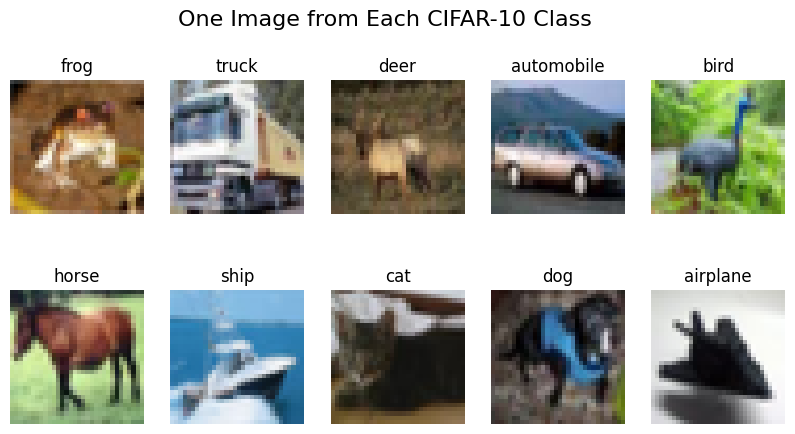

In [ ]:
#@title visualize images
classes = train_data.classes

#Store image of each class
class_images = {}

# Loop through the dataset and find one image for each class
for img, label in train_data:
    if label not in class_images:
        class_images[label] = img  # Store the first instance of each class
    if len(class_images) == 10:  # Once we have all 10 classes, stop
        break

# Plot one image of each class
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle('One Image from Each CIFAR-10 Class', fontsize=16)

for i, (label, img) in enumerate(class_images.items()):
    ax = axs[i // 5, i % 5]
    img = img.permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C) and to NumPy array
    ax.imshow(img)
    ax.set_title(classes[label])
    ax.axis('off')  # Turn off axis labels and ticks

plt.show()

In [ ]:
#@title Extract subsample images
#@markdown Uses a custom function to select indices from the original dataset.\
#@markdown The uses the Subset function to extract 5000 train images and 1000 test images:
#@markdown 500 train foreach class and 100 test for each class
train_size = 500
test_size = 100

def get_data(dataset, num_samples):
    """
      Function that gets a specific number of samples from each class
      from a dataset and returns their indices.
      @params:
            dataset:       torch tensor dataset of images
            num_samples:   int
      @return:
            selected_indices: list of integers

    """
    class_count = {i: 0 for i in range(10)}
    selected_indices = []
    for idx, (img, label) in enumerate(dataset):
      if class_count[label] < num_samples:
        selected_indices.append(idx)
        class_count[label] += 1
      #stopping criteria
      if all(count == num_samples for count in class_count.values()):
        break
    return selected_indices

# Get indices for train and test sets
train_indices = get_data(train_data, train_size)
test_indices = get_data(test_data, test_size)

#get the data
train_subset = Subset(train_data, train_indices)
test_subset = Subset(test_data, test_indices)

print("Training samples: ",len(train_subset), "\nTest samples: ", len(test_subset))

Training samples:  5000 
Test samples:  1000


In [ ]:
#@title print classes distribution in train set:
print("Train set class distribution")
for pic in classes:
  targets = [train_data.targets[i] for i in train_indices]
  print(f"{pic}: {targets.count(classes.index(pic))}")

Train set class distribution
airplane: 500
automobile: 500
bird: 500
cat: 500
deer: 500
dog: 500
frog: 500
horse: 500
ship: 500
truck: 500


In [ ]:
#@title print classes distribution in test set:
print("Test set class distribution")
for pic in classes:
  targets = [test_data.targets[i] for i in test_indices]
  print(f"{pic}: {targets.count(classes.index(pic))}")

Test set class distribution
airplane: 100
automobile: 100
bird: 100
cat: 100
deer: 100
dog: 100
frog: 100
horse: 100
ship: 100
truck: 100


# Data transformation



In [ ]:
#@title imagenet mean and std for resnet18
#@markdown Because resnet18 was trained on imagenet dataset and we are using a pretrained model to extract the features.\
#@markdown Also we resize the images to 224 × 224 × 3 and normalize them as resnet accepts this input size.
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]



upscale_norm = v2.Compose([v2.Resize(size=(224,224), antialias=True),
                           v2.Normalize(mean=mean, std=std)
                           ])

# apply the transformations
train_set_upscaled = [(upscale_norm(img), label) for img, label in train_subset]
test_set_upscaled = [(upscale_norm(img), label) for img, label in test_subset]

In [ ]:
#@title feature extraction with ResNet-18,  512 × 1 feature vectors
#@markdown Creates data loaders, loads Resnet-18 with pretrained = true, removes the last layer and with torch.no_grad() extracts the features.
#data loaders
train_loader = DataLoader(train_set_upscaled, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set_upscaled, batch_size=32, shuffle=False)

#load the model with the pretrained weights
model_ft = resnet18(pretrained=True)
# remove the last layer
model_ft = nn.Sequential(*list(model_ft.children())[:-1])
model_ft.to(device)

# put model in eval mode and extract features
model_ft.eval()
with torch.no_grad():
  train_features = []
  train_labels = []
  test_features = []
  test_labels = []
  for img, label in train_loader:
    img = img.to(device)
    feature = model_ft(img).squeeze()
    train_features.append(feature.cpu().numpy())
    train_labels.extend(label.cpu().numpy())
  for img, label in test_loader:
    img = img.to(device)
    feature = model_ft(img).squeeze()
    test_features.append(feature.cpu().numpy())
    test_labels.extend(label.cpu().numpy())


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
#@title create np arrays with the extracted features
train_features= np.vstack(train_features)
train_labels = np.array(train_labels)
test_features = np.vstack(test_features)
test_labels = np.array(test_labels)

print("train shape: features: ", train_features.shape, ", labels: ", train_labels.shape)
print("test_shape: features:", test_features.shape, ", labels:", test_labels.shape)

train shape: features:  (5000, 512) , labels:  (5000,)
test_shape: features: (1000, 512) , labels: (1000,)


Next, use PCA in scikit learn to further reduce the size of feature

vectors from 512×1 to 50×1.

In [ ]:
#@title apply sklearn principal component analysis to extract 50 features
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
#@markdown We apply fit_transform on train data and transform on test data separately to relate the test data to the train data without causing any data leakge
train_features_pca = pca.fit_transform(np.vstack(train_features))
test_features_pca = pca.transform(np.vstack(test_features))

In [ ]:
print("Train PCA: ",train_features_pca.shape, "\nTest PCA: ", test_features_pca.shape)

Train PCA:  (5000, 50) 
Test PCA:  (1000, 50)


In [ ]:
#save features and labels on disk
#np.save("train_features_pca.npy", train_features_pca)
#np.save("test_features_pca.npy", test_features_pca)
#np.save("train_labels.npy", train_labels)
#np.save("test_labels.npy", test_labels)

In [ ]:
#load saved data
#train_features_pca = np.load("train_features_pca.npy")
#test_features_pca = np.load("test_features_pca.npy")
#train_labels = np.load('train_labels.npy')
#test_labels = np.load('test_labels.npy')

## Classification metrics function

**To be used for each model to print Accuracy score, Precision, Recall and F1 score**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_classification_metrics(true_labels, predictions, average='macro'):
    """
    Calculate and print classification metrics: accuracy, precision, recall, and F1-score.

    Args:
        true_labels (list or np.array): Ground truth labels.
        predictions (list or np.array): Predicted labels by the model.
        average (str): Averaging method for precision, recall, and F1-score.
                       Use 'macro', 'micro', 'weighted', or None.

    Returns:
        None
    """
    # Calculate metrics
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average=average, zero_division=0)
    recall = recall_score(true_labels, predictions, average=average, zero_division=0)
    f1 = f1_score(true_labels, predictions, average=average, zero_division=0)

    # Print the results
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")

# Naive Bayes


## Cusotm model implementation

In [ ]:
#@title define NB class
from dataclasses import dataclass
@dataclass
class GaussNaiveBayes:
  """
  @params:
  X: array features
  y: array labels
  """
  X: np.ndarray
  y: np.ndarray

  def fit(self) -> None:
    """
    Fit function for the naive bayes: calculates the mean and variance for each class
    and stores them in self.params

    @params:
            None
    @return:
            None

    """
    self.unique_y = np.unique(self.y)
    self.num_y = len(self.unique_y)
    self.params = []

    for label in self.unique_y:
      features_label = self.X[self.y == label]
      mean = np.mean(features_label, axis=0)
      var = np.var(features_label, axis=0) + 1e-9  # Add small value to avoid zero variance
      self.params.append((mean, var))

  def predict(self, X: np.ndarray) -> np.ndarray:
    """
    Predict function for naive bayes: calculates posterior probabilities for each class
    and returns the class with the highest posterior probability.
    @params:
            X: array features
    @return:
            predictions: array of predictions

    """
    num_samples, num_features = X.shape
    predictions = np.zeros(num_samples)

    for index, feature in enumerate(X):
      posterior_probs = []
      for label_index, label in enumerate(self.unique_y):
        mean, var = self.params[label_index]
        log_likelihood = -((feature - mean)**2 / (2 * var)) - np.log(np.sqrt(2 * np.pi * var))
        total_log_likelihood = np.sum(log_likelihood)
        prior = np.log(np.sum(self.y == label) / len(self.y))
        posterior = total_log_likelihood + prior
        posterior_probs.append(posterior)

      predictions[index] = self.unique_y[np.argmax(posterior_probs)]
    return predictions

In [ ]:
#@title Train custom NB
custom_model = GaussNaiveBayes(train_features_pca, train_labels)
custom_model.fit()

In [ ]:
#save model
joblib.dump(custom_model, 'NaiveBayes_custom_model.pkl')

['NaiveBayes_custom_model.pkl']

### Predict with custom model

In [ ]:
#load model
custom_model = joblib.load('NaiveBayes_custom_model.pkl')

In [ ]:
#predict with custom model
custom_train_predictions = custom_model.predict(train_features_pca)
custom_test_predictions = custom_model.predict(test_features_pca)

#evaluate predictions
train_acc_score = accuracy_score(train_labels, custom_train_predictions)
print("\033[1mTraining Accuracy:\033[0m %.2f%% \n" % (train_acc_score*100))

test_acc_score = accuracy_score(test_labels, custom_test_predictions)
print("\033[1mTesting Accuracy:\033[0m %.2f%% \n" % (test_acc_score*100))

Training Accuracy: 80.54% 

Testing Accuracy: 79.60% 



### Custom NB evaluation

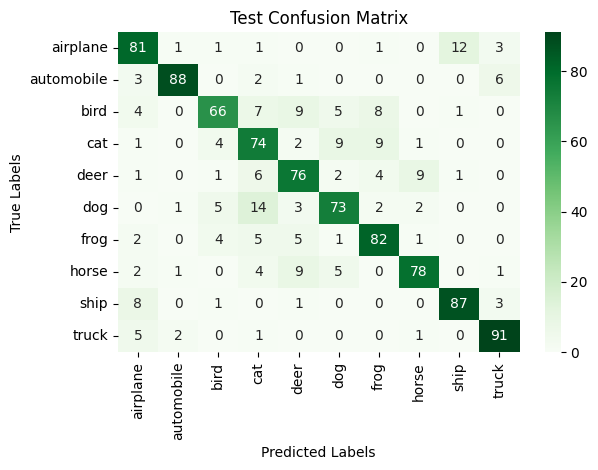

In [ ]:
#@title Confusion Matrix
cm_test = confusion_matrix(test_labels, custom_test_predictions)

# Plot test confusion matrix
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
#@title Classification report
print('\033[1mTesting classification report for the custom naive bayes classifier:\033[0m\n')
print(classification_report(test_labels, custom_test_predictions, target_names = classes))

Testing classification report for the custom naive bayes classifier:

              precision    recall  f1-score   support

    airplane       0.76      0.80      0.78       100
  automobile       0.94      0.88      0.91       100
        bird       0.80      0.66      0.73       100
         cat       0.62      0.75      0.68       100
        deer       0.76      0.75      0.75       100
         dog       0.77      0.72      0.75       100
        frog       0.75      0.82      0.78       100
       horse       0.86      0.81      0.84       100
        ship       0.84      0.87      0.86       100
       truck       0.88      0.88      0.88       100

    accuracy                           0.79      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.80      0.79      0.79      1000



In [ ]:
#@title classification metrics
print_classification_metrics(test_labels, custom_test_predictions)

Accuracy:  0.7940
Precision: 0.7992
Recall:    0.7940
F1-score:  0.7948


## Training and testing results with sklearn NB model

In [ ]:
#@title fit NB from sklearn
sk_learn_Gauss_model = GaussianNB()
sk_learn_Gauss_model.fit(train_features_pca, train_labels)


GaussianNB()

In [ ]:
#save model
joblib.dump(sk_learn_Gauss_model, 'sk_learn_Gauss_model.pkl')

['sk_learn_Gauss_model.pkl']

In [ ]:
#@title Evaluate SkLearn NB
sk_learn_Gauss_model = joblib.load('sk_learn_Gauss_model.pkl')

In [ ]:
#predict with scikit learn
NP_train_predictions = sk_learn_Gauss_model.predict(train_features_pca)
NP_test_predictions = sk_learn_Gauss_model.predict(test_features_pca)

#evaluate predictions
train_acc_score = accuracy_score(train_labels, NP_train_predictions)
print("\033[1mAccuracy:\033[0m %.2f%% \n" % (train_acc_score*100))

test_acc_score = accuracy_score(test_labels, NP_test_predictions)
print("\033[1mAccuracy:\033[0m %.2f%% \n" % (test_acc_score*100))

Accuracy: 80.54% 

Accuracy: 79.60% 



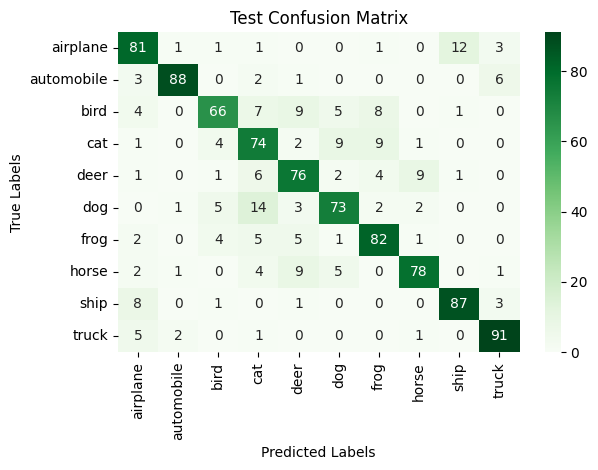

In [ ]:
cm_test = confusion_matrix(test_labels, NP_test_predictions)

# Plot test confusion matrix
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
#@title Classification report sklearn NB for testing performance
print('\033[1mTesting classification report for the scikit learn naive bayes classifier:\033[0m\n')
print(classification_report(test_labels, NP_test_predictions, target_names = classes))

Testing classification report for the scikit learn naive bayes classifier:

              precision    recall  f1-score   support

    airplane       0.76      0.81      0.78       100
  automobile       0.95      0.88      0.91       100
        bird       0.80      0.66      0.73       100
         cat       0.65      0.74      0.69       100
        deer       0.72      0.76      0.74       100
         dog       0.77      0.73      0.75       100
        frog       0.77      0.82      0.80       100
       horse       0.85      0.78      0.81       100
        ship       0.86      0.87      0.87       100
       truck       0.88      0.91      0.89       100

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



In [ ]:
#@title print classificaition metrics
print_classification_metrics(test_labels, NP_test_predictions)

Accuracy:  0.7960
Precision: 0.8000
Recall:    0.7960
F1-score:  0.7964


# Decision Tree


## Define the tree from scratch

In [ ]:
#@title Node class definition
#@markdown Contains:
#@markdown >a initialization function\
#@markdown >a function that calculates the Gini index\
#@markdown >a function that maps labels to contiguous integers\
#@markdown >a function that finds the best feature and threshold to split the data

class Node:
  def __init__(self, feature_index = None, threshold = None, value = None, left = None, right = None):
    """
      Initializes a node in the decision tree.
      @params:
        feature_index: int
        threshold: double
        value: int

        left: Node
        right: Node

    """
    self.feature_index=feature_index #index of split
    self.threshold = threshold #value determining the split
    self.value = value #predicted class
    self.left = left #left child
    self.right = right #right child

def gini(input):
  """Calculate gini index = 1-sum of squared probabilities for each class
  @params:
        input: array
  @return:
    gini: double

  """
  classes, counts = np.unique(input, return_counts=True) # two arrays
  num_samples = len(input)
  probs = counts/num_samples
  gini = 1 - sum(probs**2)
  return gini

def map_labels(y):
    """
    Maps labels to contiguous integers.
    @params:
    y: array labels
    @return:
    y_mapped: array
    classes: array
    """
    classes, y_mapped = np.unique(y, return_inverse=True)
    return y_mapped, classes

def split_node(X,y,metric):
  """
  Finds the best feature and threshold to split the data.
  @params:
  X: array features
  y: array labels
  metric: function

  @return
  selected_feature: array
  threshold: double
  """

  num_features = X.shape[1] # number of columns
  selected_feature = None
  threshold = None
  score = metric(y)
  best_score = 0

 # Map labels to contiguous integers
  y_mapped, classes = map_labels(y)
  num_classes = len(classes)

  for i in range(num_features):
        sorted_indices = np.argsort(X[:, i])
        X_sorted, y_sorted = X[sorted_indices, i], y_mapped[sorted_indices]

        left_counts = np.zeros(num_classes, dtype=int)
        right_counts = np.bincount(y_sorted, minlength=num_classes)

        for j in range(1, len(y_sorted)):
            left_counts[y_sorted[j - 1]] += 1
            right_counts[y_sorted[j - 1]] -= 1

            if X_sorted[j] == X_sorted[j - 1]:
                continue

            left_prob = left_counts / j
            right_prob = right_counts / (len(y) - j)
            gini_left = 1 - np.sum(left_prob**2)
            gini_right = 1 - np.sum(right_prob**2)
            curr_score = (j / len(y)) * gini_left + ((len(y) - j) / len(y)) * gini_right

            diff = metric(y_sorted) - curr_score
            if diff > best_score:
                best_score = diff
                selected_feature = i
                threshold = (X_sorted[j - 1] + X_sorted[j]) / 2

  return selected_feature, threshold

In [ ]:
#@title Build the tree recursively

def tree(X, y, metric, depth=1, max_depth=-1, min_samples_split=2):
    """
    Builds the decision tree recursively.
    @params:
    X: array features
    y: array labels
    metric: function
    depth: int
    max_depth: int
    min_samples_split: int
    @return:
    Node object
    """
    # Stop if all labels are identical, depth limit is reached, or samples are below min_samples_split
    if len(np.unique(y)) == 1 or (max_depth != -1 and depth >= max_depth) or len(y) < min_samples_split:
        return Node(value=np.bincount(y).argmax())

    # Find the best feature and threshold to split
    feature, threshold = split_node(X, y, metric)

    # If no valid split, create a leaf node with the most common label
    if feature is None:
        return Node(value=np.bincount(y).argmax())

    # Split data
    left_i = X[:, feature] <= threshold
    right_i = ~left_i

    # Recursively build the left and right subtree, incrementing depth
    left_tree = tree(X[left_i], y[left_i], metric, depth + 1, max_depth, min_samples_split)
    right_tree = tree(X[right_i], y[right_i], metric, depth + 1, max_depth, min_samples_split)

    # Return current node with feature, threshold, left, and right children
    return Node(feature_index=feature, threshold=threshold, left=left_tree, right=right_tree)

In [ ]:
#@title Predict with custom tree
#@markdown Contains:
#@markdown >a funtion that traverses the tree\
#@markdown >a predict funtion
def pred_node(node,input):
  """
  Recursively traverses the tree to predict the class of the input
  @params:
  node: Node object
  input: array
  @return:
  predicted class
  """
  if node.value is not None:
    return node.value
  if input[node.feature_index] <= node.threshold:
    return pred_node(node.left, input)
  else:
    return pred_node(node.right, input)

def predict(tree, X):
  """
  Predicts the class of the input
  @params:
  tree: Node object
  X: array
  @return:
  array of predictions
  """
  y_pred = []
  for x in X:
    pred = pred_node(tree, x)
    y_pred.append(pred)

  return np.array(y_pred)

## Experiment by varying the depth of the tree


Max Depth: 1, Test accuracy: 10.0%
Max Depth: 11, Test accuracy: 60.3%
Max Depth: 21, Test accuracy: 59.3%
Max Depth: 31, Test accuracy: 59.2%
Max Depth: 41, Test accuracy: 59.2%
Best Depth: 11


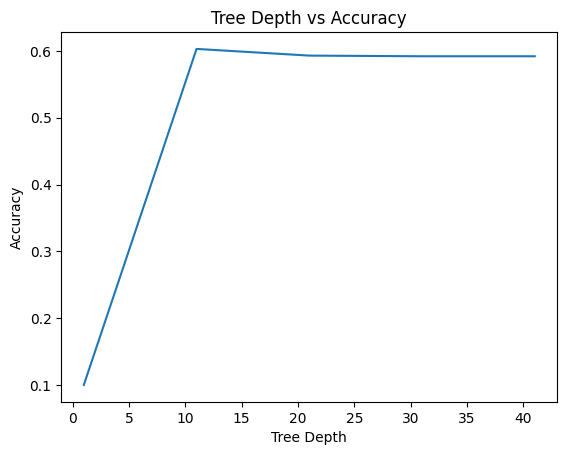

In [ ]:
#@title Train trees at different depths
#@markdown 1.	**Depth Range:** Create a range of tree depths to evaluate from 1 to 50, stepping by 10. This en-sures we test shallow trees as well as deeper ones for comparison.
#@markdown 2.	**Storage:** dictionary to store trained trees with their corresponding depths. Define a list performance to record the accura-cy at each depth.


depths = range(1, 51,10)
trees = {}
performance = []

for max_depth in depths:
    # Train tree
    tree_model = tree(train_features_pca, train_labels, gini, max_depth=max_depth)
    trees[max_depth] = tree_model

    # Predict and evaluate
    y_pred = predict(tree_model, test_features_pca)
    accuracy = accuracy_score(test_labels, y_pred)
    performance.append((max_depth, accuracy))
    print(f"Max Depth: {max_depth}, Test accuracy: {accuracy*100:.1f}%")

# Find the best depth
best_depth = max(performance, key=lambda x: x[1])[0]
print(f"Best Depth: {best_depth}")

# Plot performance
depths, accuracies = zip(*performance)
plt.plot(depths, accuracies)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Tree Depth vs Accuracy')
plt.show()

# Retrain with the best depth
optimal_tree = tree(train_features_pca, train_labels, gini, max_depth=best_depth)


In [ ]:
#save model
joblib.dump(optimal_tree, 'best_custom_tree.pkl')

['best_custom_tree.pkl']

## Make predictions and evaluate model

In [ ]:
#load pretrained tree
optimal_tree = joblib.load('best_custom_tree.pkl')

#define best depth
best_depth=11

In [ ]:
predictions_custom_train = predict(optimal_tree , train_features_pca)
predictions_custom_test = predict(optimal_tree , test_features_pca)

In [ ]:
#training accuracy
train_acc_score = accuracy_score(train_labels, predictions_custom_train)
#testing accuracy
test_acc_score = accuracy_score(test_labels, predictions_custom_test)
print(f"\033[1mAccuracy with {best_depth} depth:\nTrain: \033[0m %.2f%%" % (train_acc_score*100))
print("\033[1mTest:\033[0m %.2f%% \n" % (test_acc_score*100))

Accuracy with 11 depth:
Train:  85.02%
Test: 60.00% 



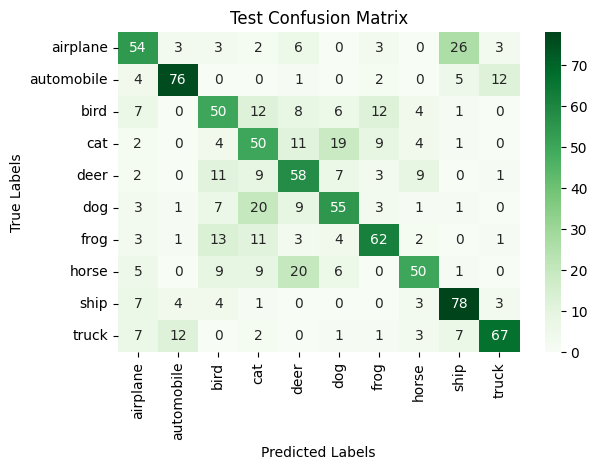

In [ ]:
#@title Confusion Matrix
cm_test = confusion_matrix(test_labels, predictions_custom_test)

# Plot test confusion matrix
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
#@title Classification report custom tree
print('\033[1mTesting classification report for the custom decision tree classifier classifier:\033[0m\n')
print(classification_report(test_labels, predictions_custom_test, target_names = classes))

Testing classification report for the custom decision tree classifier classifier:

              precision    recall  f1-score   support

    airplane       0.59      0.54      0.56       100
  automobile       0.78      0.76      0.77       100
        bird       0.49      0.48      0.48       100
         cat       0.43      0.50      0.46       100
        deer       0.50      0.60      0.55       100
         dog       0.57      0.56      0.56       100
        frog       0.65      0.62      0.64       100
       horse       0.68      0.50      0.57       100
        ship       0.66      0.79      0.72       100
       truck       0.78      0.68      0.73       100

    accuracy                           0.60      1000
   macro avg       0.61      0.60      0.60      1000
weighted avg       0.61      0.60      0.60      1000



In [ ]:
#print classificaiton metrics
print_classification_metrics(test_labels, predictions_custom_test)

Accuracy:  0.6030
Precision: 0.6114
Recall:    0.6030
F1-score:  0.6040


## Scikit’s implementation of a Decision Tree.


Max Depth: 1, Test accuracy: 59.8%
Max Depth: 11, Test accuracy: 60.5%
Max Depth: 21, Test accuracy: 59.4%
Max Depth: 31, Test accuracy: 60.0%
Max Depth: 41, Test accuracy: 59.9%
Max Depth: 51, Test accuracy: 59.8%
Best Depth: 11


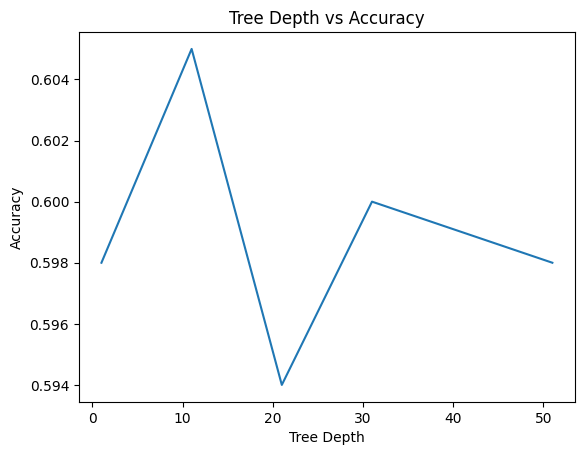

In [ ]:
# Train trees at different depths
depths = range(1, 52,10)
trees = {}
performance = []

for max_depth in depths:
    # Train tree
    sk_learn_tree_model = DecisionTreeClassifier(max_depth=i, min_samples_split=2)
    sk_learn_tree_model.fit(train_features_pca, train_labels)

    # Predict and evaluate
    y_pred = sk_learn_tree_model.predict(test_features_pca)
    accuracy = accuracy_score(test_labels, y_pred)
    performance.append((max_depth, accuracy))
    print(f"Max Depth: {max_depth}, Test accuracy: {accuracy*100:.1f}%")

# Find the best depth
best_depth = max(performance, key=lambda x: x[1])[0]
print(f"Best Depth: {best_depth}")

# Plot performance
depths, accuracies = zip(*performance)
plt.plot(depths, accuracies)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Tree Depth vs Accuracy')
plt.show()

# Retrain with the best depth
optimal_sk_learn_tree = DecisionTreeClassifier(max_depth=best_depth, min_samples_split=2).fit(train_features_pca, train_labels)

In [ ]:
#train a scikit learn decision tree

sk_train_predictions = optimal_sk_learn_tree.predict(train_features_pca)
train_acc_score = accuracy_score(train_labels, sk_train_predictions)

sk_test_predictions = optimal_sk_learn_tree.predict(test_features_pca)
test_acc_score = accuracy_score(test_labels, sk_test_predictions)

print(f"\033[1mDepth: {best_depth}\033[0m\nTrain accuracy: {train_acc_score*100:.2f}%\nTest accuracy: {test_acc_score*100:.2f}%")

Depth: 11
Train accuracy: 91.74%
Test accuracy: 60.60%


In [ ]:
#save model
joblib.dump(optimal_sk_learn_tree, 'best_sk_learn_tree.pkl')

['best_sk_learn_tree.pkl']

In [ ]:
#@title Evaluate sklearn tree

In [ ]:
#load trained model
optimal_sk_learn_tree = joblib.load('best_sk_learn_tree.pkl')

#set best depth
best_depth = 11

In [ ]:
#@title Predict with sklearn tree
sk_test_predictions = optimal_sk_learn_tree.predict(test_features_pca)

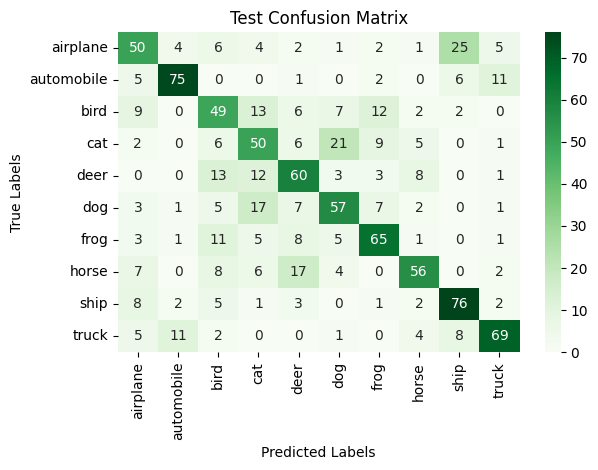

In [ ]:
cm_test = confusion_matrix(test_labels, sk_test_predictions)

# Plot test confusion matrix
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
#print classification report for sklearn tree model
print('\033[1mTesting classification report for the scikit learn decision tree classifier:\033[0m\n')
print(classification_report(test_labels, sk_test_predictions, target_names = classes))

Testing classification report for the scikit learn decision tree classifier:

              precision    recall  f1-score   support

    airplane       0.54      0.50      0.52       100
  automobile       0.80      0.75      0.77       100
        bird       0.47      0.49      0.48       100
         cat       0.46      0.50      0.48       100
        deer       0.55      0.60      0.57       100
         dog       0.58      0.57      0.57       100
        frog       0.64      0.65      0.65       100
       horse       0.69      0.56      0.62       100
        ship       0.65      0.76      0.70       100
       truck       0.74      0.69      0.72       100

    accuracy                           0.61      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.61      0.61      0.61      1000



In [ ]:
#print classification metrics
print_classification_metrics(test_labels, sk_test_predictions)

Accuracy:  0.6070
Precision: 0.6119
Recall:    0.6070
F1-score:  0.6078


4. Evaluate all of the above models on the test set of CIFAR-10 (feature vectors of the images in the test
set).


# MLP


In [ ]:
#@title Model Definition
class mlp_model(torch.nn.Module):

  """
    MLP class with depth and hidden size as hyperparameters.
    @params:
    depth: int
    in_size: int
    out_size: int
    hidden_size: int

  """

  def __init__(self, depth=1, in_size = 50, out_size = 10, hidden_size = 512):
    super(mlp_model, self).__init__()
    self.depth = depth
    self.in_size = in_size
    self.out_size = out_size
    self.hidden_size = hidden_size
    self.layers = torch.nn.ModuleList()

    #first layer to take input size
    self.layers.append(torch.nn.Linear(in_size, hidden_size))

    #adaptive number of layers based on depth
    for i in range(depth):
      self.layers.append(torch.nn.Linear(hidden_size, hidden_size))
      self.layers.append(torch.nn.BatchNorm1d(hidden_size))
      self.layers.append(torch.nn.ReLU())
    #output layer
    self.layers.append(torch.nn.Linear(hidden_size, out_size))

  def forward(self, X):
    for layer in self.layers:
      X = layer(X)
    return X


## Train loop

In [ ]:
#training loop
epochs = 100


loss_fn = torch.nn.CrossEntropyLoss()

#train model
def train_mlp(model, trainloader, testloader, epochs):

  model = model.to(device)
  lr = 0.1
  momentum = 0.9
  optimizer = torch.optim.SGD(model.parameters(), lr = lr, momentum = momentum)
  loss_fn = torch.nn.CrossEntropyLoss()

  train_accs = []
  test_accs = []
  for epoch in range(epochs):
    model.train()
    correct_train = 0.0
    total_train = 0.0
    #running_loss = 0.0

    #train
    for (data, targets) in trainloader:

      data = data.to(device)
      targets = targets.to(device)

      #forward pass
      y_pred = model(data)
      loss = loss_fn(y_pred, targets)
      #running_loss += loss.item()

      #backward pass
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      #calculate accuracy:
      _, pred = torch.max(y_pred, 1)
      correct_train += (pred == targets).sum().item()
      total_train += targets.size(0)
    train_acc = correct_train / total_train
    train_accs.append(train_acc)

    #test
    model.eval()
    correct_test = 0.0
    total_test = 0.0
    #test_loss = 0.0


    with torch.no_grad():

      for (data, targets) in testloader:

        data = data.to(device)
        targets = targets.to(device)

        #forward pass
        y_pred = model(data)
        loss = loss_fn(y_pred, targets)
        #test_loss += loss.item()

        #calculate accuracy
        _, pred = torch.max(y_pred,1)
        correct_test += (pred == targets).sum().item()
        total_test += targets.size(0)

    test_acc = correct_test / total_test
    test_accs.append(test_acc)

    if (epoch+1) % 10 == 0:
      print(f'Epoch{epoch+1}, training accuracy: {train_acc*100:.2f}%, test accuracy: {test_acc*100:.2f}%')

  return   train_accs, test_accs

## Data loaders

In [ ]:
#make dataloaders

class dataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype = torch.float32)
    self.labels = torch.tensor(labels)

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    feature = self.features[idx]
    label  = self.labels[idx]
    return feature, label

In [ ]:
train_dataset = dataset(train_features_pca,train_labels)
test_dataset = dataset(test_features_pca, test_labels)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 64, shuffle = False)

In [ ]:
for batch_features, batch_labels in train_loader:
    print("Feature shape:", batch_features.shape)
    print("Label shape:", batch_labels.shape)
    break  # Stop after the first batch

Feature shape: torch.Size([64, 50])
Label shape: torch.Size([64])


## Instantiate and train model

In [ ]:
#instantiate a model
mlp = mlp_model().to(device)
summary(mlp, input_size=(50,))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]          26,112
            Linear-2                  [-1, 512]         262,656
       BatchNorm1d-3                  [-1, 512]           1,024
              ReLU-4                  [-1, 512]               0
            Linear-5                   [-1, 10]           5,130
Total params: 294,922
Trainable params: 294,922
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.13
Estimated Total Size (MB): 1.14
----------------------------------------------------------------


In [ ]:
#@title Train mlp with different depths and hidden values:
depths = [1,2,3, 4, 5]
all_results = {}
for d in depths:
  mlp = mlp_model(depth=d)
  print(f'Training with depth: {d} ')
  results = train_mlp(mlp, train_loader, test_loader, epochs=50)
  all_results[d] = results

Training with depth: 1 
Epoch10, training accuracy: 89.24%, test accuracy: 82.10%
Epoch20, training accuracy: 96.36%, test accuracy: 80.30%
Epoch30, training accuracy: 96.84%, test accuracy: 78.50%
Epoch40, training accuracy: 97.46%, test accuracy: 80.30%
Epoch50, training accuracy: 98.32%, test accuracy: 79.90%
Training with depth: 2 
Epoch10, training accuracy: 89.86%, test accuracy: 82.70%
Epoch20, training accuracy: 94.84%, test accuracy: 82.10%
Epoch30, training accuracy: 94.62%, test accuracy: 79.10%
Epoch40, training accuracy: 99.50%, test accuracy: 80.90%
Epoch50, training accuracy: 99.06%, test accuracy: 81.90%
Training with depth: 3 
Epoch10, training accuracy: 85.86%, test accuracy: 80.70%
Epoch20, training accuracy: 91.86%, test accuracy: 79.80%
Epoch30, training accuracy: 94.36%, test accuracy: 81.40%
Epoch40, training accuracy: 94.72%, test accuracy: 79.40%
Epoch50, training accuracy: 97.18%, test accuracy: 79.70%
Training with depth: 4 
Epoch10, training accuracy: 85.22%

<Figure size 600x600 with 0 Axes>

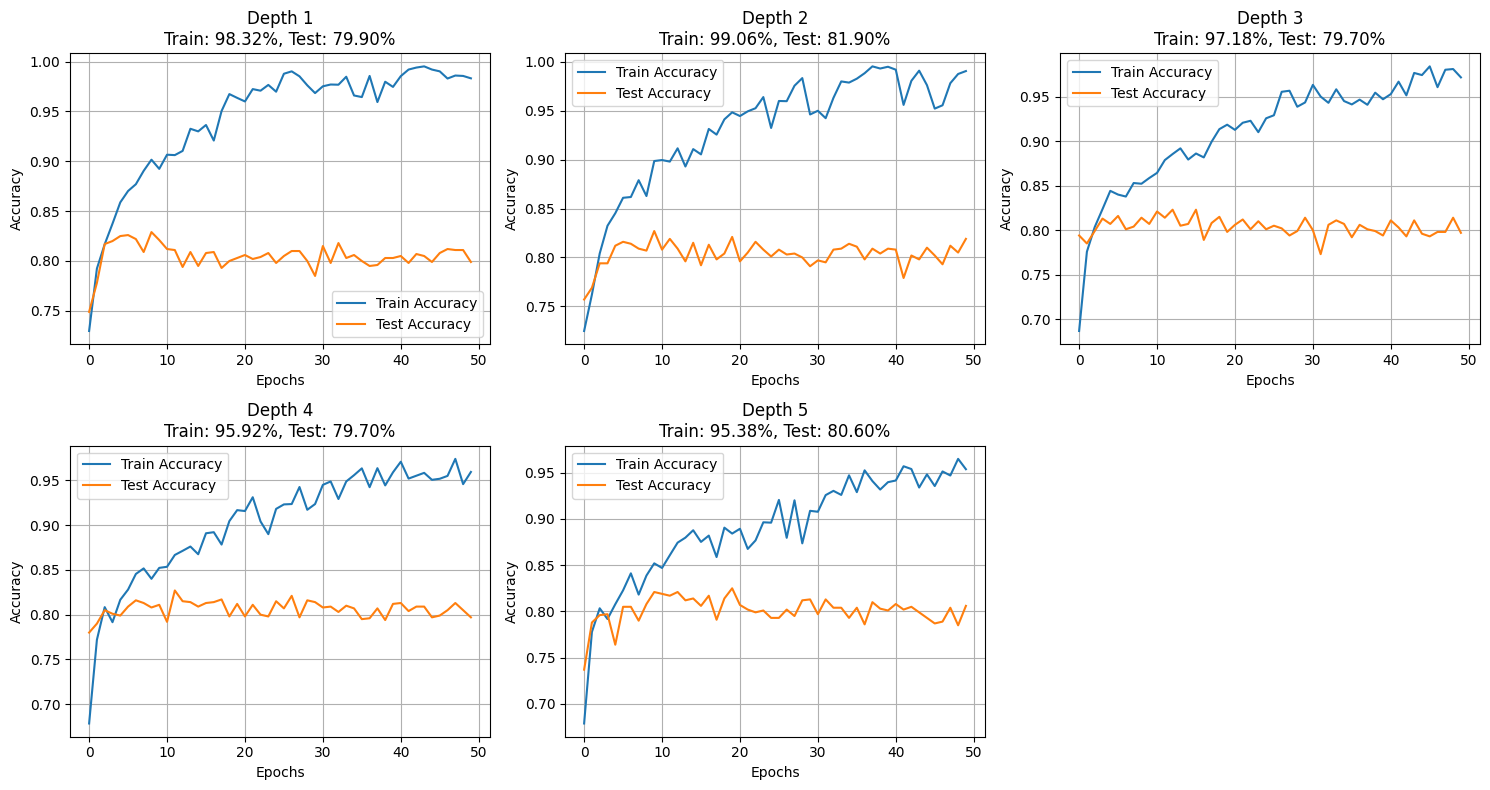

In [ ]:
#@title Plot performance based on depth

depths = list(all_results.keys())
results = list(all_results.values())

plt.figure(figsize=(6, 6))
num_subplots = len(results)
cols = 3  # Number of columns per row
rows = (num_subplots + cols - 1) // cols  # Calculate required rows

plt.figure(figsize=(cols * 5, rows * 4))  # Adjust the figure size dynamically

for i in range(num_subplots):
    train_acc = np.array(results[i][0])  # Training accuracy over epochs
    test_acc = np.array(results[i][1])   # Test accuracy over epochs

    plt.subplot(rows, cols, i + 1)  # Create subplot grid
    plt.plot(train_acc, label='Train Accuracy')
    plt.plot(test_acc, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Depth {depths[i]}\nTrain: {train_acc[-1]*100:.2f}%, Test: {test_acc[-1]*100:.2f}%')
    plt.legend()
    plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
#@title Train with different hidden sizes
hidden_sizes = [16, 32, 64, 128, 256]
all_results = {}
for h in hidden_sizes:
    mlp = mlp_model(depth=2, hidden_size=h)
    print(f'Training with hidden size: {h} and depth: {2}')
    results = train_mlp(mlp, train_loader, test_loader, epochs=50)
    all_results[h] = results

Training with hidden size: 16 and depth: 2
Epoch10, training accuracy: 82.86%, test accuracy: 81.10%
Epoch20, training accuracy: 84.56%, test accuracy: 81.60%
Epoch30, training accuracy: 83.72%, test accuracy: 80.20%
Epoch40, training accuracy: 84.42%, test accuracy: 82.10%
Epoch50, training accuracy: 85.40%, test accuracy: 80.50%
Training with hidden size: 32 and depth: 2
Epoch10, training accuracy: 83.68%, test accuracy: 80.30%
Epoch20, training accuracy: 86.42%, test accuracy: 82.40%
Epoch30, training accuracy: 87.04%, test accuracy: 81.50%
Epoch40, training accuracy: 88.00%, test accuracy: 80.60%
Epoch50, training accuracy: 89.24%, test accuracy: 81.20%
Training with hidden size: 64 and depth: 2
Epoch10, training accuracy: 84.66%, test accuracy: 82.10%
Epoch20, training accuracy: 87.32%, test accuracy: 80.40%
Epoch30, training accuracy: 89.02%, test accuracy: 81.10%
Epoch40, training accuracy: 91.96%, test accuracy: 80.20%
Epoch50, training accuracy: 93.28%, test accuracy: 79.40%
T

<Figure size 600x600 with 0 Axes>

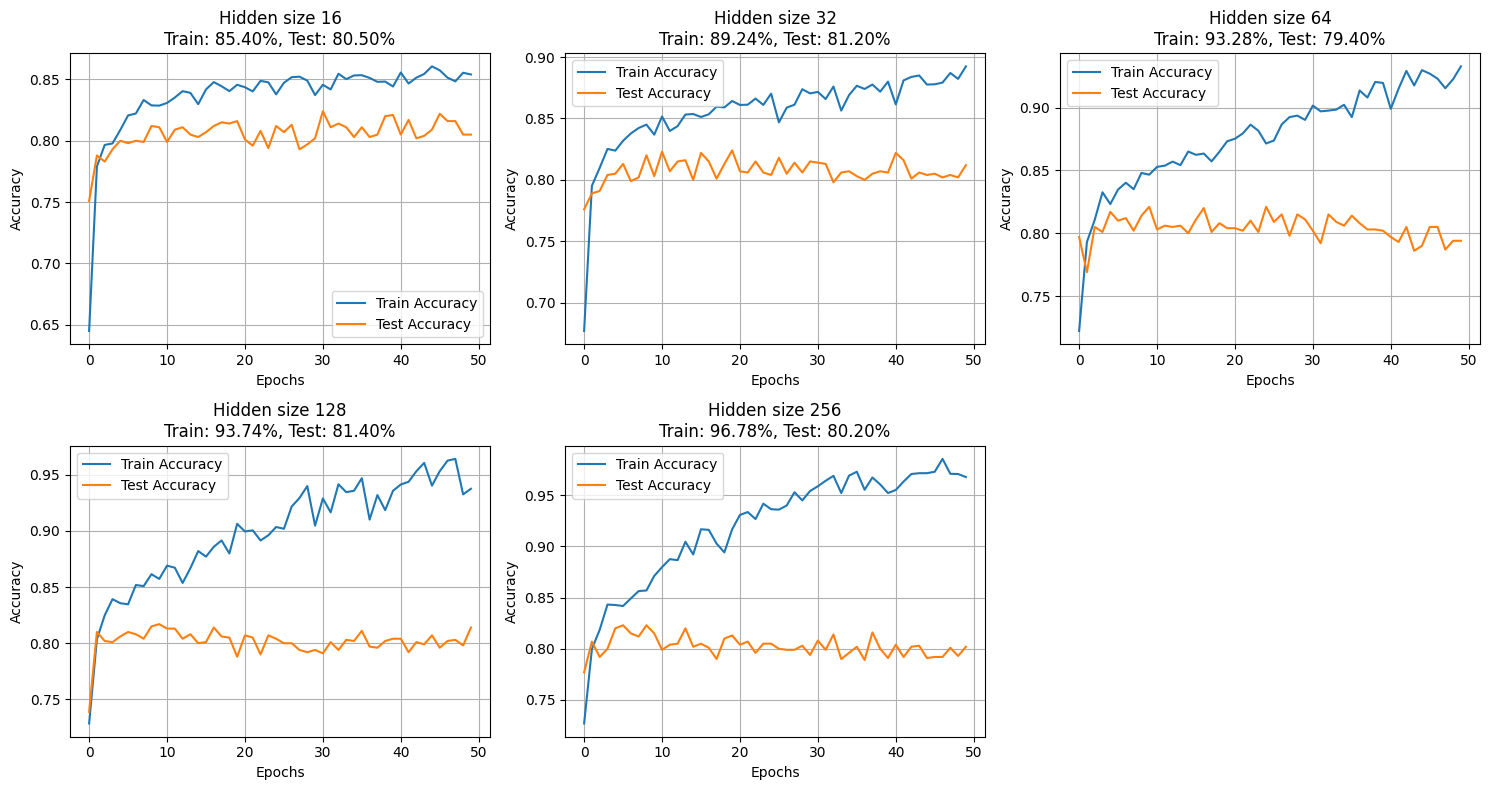

In [ ]:
#@title Plot performance based on hidden size

depths = list(all_results.keys())
results = list(all_results.values())

plt.figure(figsize=(6, 6))
num_subplots = len(results)
cols = 3  # Number of columns per row
rows = (num_subplots + cols - 1) // cols  # Calculate required rows

plt.figure(figsize=(cols * 5, rows * 4))  # Adjust the figure size dynamically

for i in range(num_subplots):
    train_acc = np.array(results[i][0])  # Training accuracy over epochs
    test_acc = np.array(results[i][1])   # Test accuracy over epochs

    plt.subplot(rows, cols, i + 1)  # Create subplot grid
    plt.plot(train_acc, label='Train Accuracy')
    plt.plot(test_acc, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Hidden size {depths[i]}\nTrain: {train_acc[-1]*100:.2f}%, Test: {test_acc[-1]*100:.2f}%')
    plt.legend()
    plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
#@title Train MLP with best depth and best hidden layers and save
mlp = mlp_model(depth=2, hidden_size=32).to(device)
results = train_mlp(mlp, train_loader, test_loader, epochs=40)

Epoch10, training accuracy: 84.56%, test accuracy: 81.60%
Epoch20, training accuracy: 85.48%, test accuracy: 80.90%
Epoch30, training accuracy: 86.16%, test accuracy: 81.60%
Epoch40, training accuracy: 87.32%, test accuracy: 80.60%


In [ ]:
#save mlp
torch.save(mlp.state_dict(), 'mlp_model.pth')

### MLP evaluation

In [ ]:
def print_classification_metrics(true_labels, predictions, average='macro'):
    """
    Calculate and print classification metrics: accuracy, precision, recall, and F1-score.
    """
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average=average, zero_division=0)
    recall = recall_score(true_labels, predictions, average=average, zero_division=0)
    f1 = f1_score(true_labels, predictions, average=average, zero_division=0)

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")

In [ ]:
# 1. Load the saved model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model =mlp_model(depth=2, hidden_size=32).to(device)
model.load_state_dict(torch.load("mlp_model.pth"))  # Replace with the path to your saved model
model = model.to(device)
model.eval()


# 3. Make predictions
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)  # Model predictions
        _, preds = torch.max(outputs, 1)  # Convert logits to class predictions
        all_preds.extend(preds.cpu().numpy())  # Move to CPU and collect predictions
        all_labels.extend(labels.cpu().numpy())  # Move to CPU and collect true labels


<ipython-input-130-9cd7b226657d>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("mlp_model.pth"))  # Replace with the path to your saved m

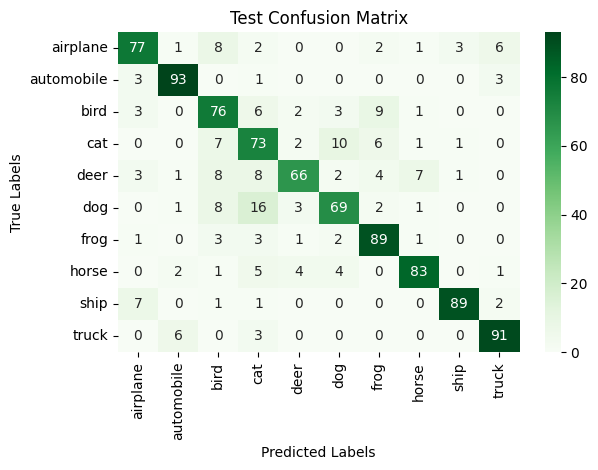

In [ ]:
#confusion matrix and classification report
cm_mlp = confusion_matrix(all_labels, all_preds)

# Plot test confusion matrix
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
#classification report
print('\033[1mTesting classification report for the MLP classifier:\033[0m\n')
print(classification_report(all_labels, all_preds, target_names = classes))

Testing classification report for the MLP classifier:

              precision    recall  f1-score   support

    airplane       0.82      0.77      0.79       100
  automobile       0.89      0.93      0.91       100
        bird       0.68      0.76      0.72       100
         cat       0.62      0.73      0.67       100
        deer       0.85      0.66      0.74       100
         dog       0.77      0.69      0.73       100
        frog       0.79      0.89      0.84       100
       horse       0.87      0.83      0.85       100
        ship       0.95      0.89      0.92       100
       truck       0.88      0.91      0.90       100

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



In [ ]:
print_classification_metrics(all_labels, all_preds)

Accuracy:  0.8060
Precision: 0.8122
Recall:    0.8060
F1-score:  0.8065


# CNN


In [ ]:
#@title train function with early stopping
#@markdown This function is used to train the CNN models in this section.\
#@markdown It uses an early stopping criteria based on validation accuracy measured for each epoch.\
#@markdown It takes a parameter called "patientce" which is the number of epochs to wait for no improvement to stop training.
def train_vgg(model, trainloader, testloader, epochs, lr, momentum, weight_decay, patience=5):

    """
    Train a VGG model with early stopping.
    @params
        model: VGG model instance.
        trainloader: DataLoader for training data.
        testloader: DataLoader for test data.
        epochs: Number of training epochs.
        lr: Learning rate.
        momentum: SGD momentum.
        weight_decay: Weight decay for optimizer.
        patience: Patience for early stopping.
    @returns
        train_accs: List of training accuracies for each epoch.
        test_accs: List of test accuracies for each epoch.

    """
    model = model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
    loss_fn = torch.nn.CrossEntropyLoss()

    train_accs = []
    test_accs = []

    best_test_acc = 0.0  # Best test accuracy observed
    patience_counter = 0  # Counter for early stopping

    for epoch in range(epochs):
        model.train()
        correct_train = 0.0
        total_train = 0.0

        for (data, targets) in trainloader:
            data, targets = data.to(device), targets.to(device)

            # Forward pass
            y_pred = model(data)
            loss = loss_fn(y_pred, targets)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Calculate training accuracy
            _, pred = torch.max(y_pred, 1)
            correct_train += (pred == targets).sum().item()
            total_train += targets.size(0)
        train_acc = correct_train / total_train
        train_accs.append(train_acc)

        # Evaluate on test set
        model.eval()
        correct_test = 0.0
        total_test = 0.0
        with torch.no_grad():
            for (data, targets) in testloader:
                data, targets = data.to(device), targets.to(device)

                # Forward pass
                y_pred = model(data)
                loss = loss_fn(y_pred, targets)

                # Calculate test accuracy
                _, pred = torch.max(y_pred, 1)
                correct_test += (pred == targets).sum().item()
                total_test += targets.size(0)
        test_acc = correct_test / total_test
        test_accs.append(test_acc)

        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}, training accuracy: {train_acc*100:.2f}%, test accuracy: {test_acc*100:.2f}%')

        # Early stopping logic
        if test_acc > best_test_acc:
            best_test_acc = test_acc  # Update best accuracy
            patience_counter = 0     # Reset patience counter
        else:
            patience_counter += 1    # Increment patience counter

        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}. Best test accuracy: {best_test_acc*100:.2f}%")
            break

    return train_accs, test_accs


In [ ]:
#@title hyperparameter search function definition
#@markdown This function performs a grid search for the best batch size and learning rate.\
#@markdown Uses validation accuracy.\
#@markdown Depends on the training function defined earlier.

def hyperparameter_search(
    model_class,
    train_subset,
    test_subset,
    batch_sizes,
    learning_rates,
    epochs=100,
    momentum=0.9,
    weight_decay=0.0005,
    patience=10,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
):
    """
    Perform hyperparameter search over batch sizes and learning rates.

    Args:
        model_class: Callable that returns a fresh instance of the model.
        train_subset: Training dataset.
        test_subset: Test dataset.
        batch_sizes: List of batch sizes to evaluate.
        learning_rates: List of learning rates to evaluate.
        epochs: Number of training epochs.
        momentum: SGD momentum.
        weight_decay: Weight decay for optimizer.
        patience: Patience for early stopping.
        device: Device to use ('cuda' or 'cpu').

    Returns:
        all_results: Dictionary of results for each hyperparameter combination.
        best_params: Best hyperparameter combination (batch_size, learning_rate).
        best_accuracy: Best test accuracy achieved.
    """
    all_results = {}
    best_accuracy = 0.0
    best_params = None

    for b in batch_sizes:
        for l in learning_rates:
            # Initialize dataloaders
            train_loader = DataLoader(train_subset, batch_size=b, shuffle=True)
            test_loader = DataLoader(test_subset, batch_size=b, shuffle=False)

            print(f"Training with batch size: {b} and learning rate: {l}")

            # Create a new model instance for each run
            model = model_class().to(device)

            # Train the model and capture results
            train_accs, test_accs = train_vgg(
                model, train_loader, test_loader,
                epochs=epochs, lr=l, momentum=momentum,
                weight_decay=weight_decay, patience=patience
            )
            all_results[(b, l)] = (train_accs, test_accs)

            # Update best parameters if current accuracy is better
            if test_accs[-1] > best_accuracy:
                best_accuracy = test_accs[-1]
                best_params = (b, l)
            print(f"Finished training with batch size {b}, learning rate {l}. Final test accuracy: {test_accs[-1]*100:.2f}%\n")

    print(f"Best parameters: Batch size = {best_params[0]}, Learning rate = {best_params[1]}")
    print(f"Best test accuracy: {best_accuracy*100:.2f}%")

    return all_results, best_params, best_accuracy


In [ ]:
#@title load and normalize image data
img_size = (32,32)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std),

])

#apply transformation to train and test
train_normalized =datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_normalized = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

#get the subsets again
#get the data
train_subset = Subset(train_normalized, train_indices)
test_subset = Subset(test_normalized, test_indices)

Files already downloaded and verified
Files already downloaded and verified


## Classic VGG11

In [ ]:
#@title Define Classic VGG Model

class VGGnet(torch.nn.Module):

  """
      Classic VGG11 implementation class.

  """
  def __init__(self):
    super(VGGnet, self).__init__()
    self.conv_layers = torch.nn.Sequential(
    #conv1
    nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1), nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),
    #conv2
    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1), nn.BatchNorm2d(128), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),
    #conv3
    nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1), nn.BatchNorm2d(256), nn.ReLU(),
    #conv4
    nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1), nn.BatchNorm2d(256), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),
    #conv5
    nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1), nn.BatchNorm2d(512), nn.ReLU(),
    #conv6
    nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1), nn.BatchNorm2d(512), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),
    #conv7
    nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1), nn.BatchNorm2d(512), nn.ReLU(),
    #conv8
    nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1), nn.BatchNorm2d(512), nn.ReLU(), nn.MaxPool2d(kernel_size = 2, stride = 2),
    )
    self.fc_layers = torch.nn.Sequential(
    nn.Linear(512 * 1 * 1, 4096), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(4096, 10),
    )

  def forward(self, x):
    x = self.conv_layers(x)
    x = x.view(x.size(0), -1)
    x = self.fc_layers(x)
    return x


In [ ]:
#@title initialize model
VGG = VGGnet().to(device)

summary(VGG, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5          [-1, 128, 16, 16]          73,856
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
         MaxPool2d-8            [-1, 128, 8, 8]               0
            Conv2d-9            [-1, 256, 8, 8]         295,168
      BatchNorm2d-10            [-1, 256, 8, 8]             512
             ReLU-11            [-1, 256, 8, 8]               0
           Conv2d-12            [-1, 256, 8, 8]         590,080
      BatchNorm2d-13            [-1, 256, 8, 8]             512
             ReLU-14            [-1, 25

In [ ]:
#@title Hyperparameter search
batch_sizes = [128, 256, 512]
learning_rates = [0.01, 0.001, 0.0001]

results, best_hyperparams, best_test_acc = hyperparameter_search(
    model_class=VGGnet,
    train_subset=train_subset,
    test_subset=test_subset,
    batch_sizes=batch_sizes,
    learning_rates=learning_rates,
    epochs=100,
    momentum=0.9,
    weight_decay=0.0005,
    patience=4
)

print(f"Best Hyperparameters: {best_hyperparams}")
print(f"Best Test Accuracy: {best_test_acc*100:.2f}%")

Training with batch size: 128 and learning rate: 0.01
Early stopping triggered at epoch 8. Best test accuracy: 51.20%
Finished training with batch size 128, learning rate 0.01. Final test accuracy: 51.10%

Training with batch size: 128 and learning rate: 0.001
Epoch 10, training accuracy: 88.50%, test accuracy: 42.30%
Early stopping triggered at epoch 11. Best test accuracy: 51.60%
Finished training with batch size 128, learning rate 0.001. Final test accuracy: 50.80%

Training with batch size: 128 and learning rate: 0.0001
Epoch 10, training accuracy: 28.54%, test accuracy: 31.20%
Epoch 20, training accuracy: 41.72%, test accuracy: 40.30%
Epoch 30, training accuracy: 54.34%, test accuracy: 48.20%
Epoch 40, training accuracy: 70.40%, test accuracy: 53.10%
Early stopping triggered at epoch 47. Best test accuracy: 53.80%
Finished training with batch size 128, learning rate 0.0001. Final test accuracy: 53.50%

Training with batch size: 256 and learning rate: 0.01
Epoch 10, training accura

In [ ]:
#@title train with best lr and batchsize
VGG = VGGnet().to(device)
batch_size=512
learning_rate=0.01

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

train_accs, test_accs = train_vgg(VGG, train_loader, test_loader, epochs=100, lr=learning_rate,
                                  momentum=0.9, weight_decay=0.0005, patience=10)

Epoch 10, training accuracy: 90.02%, test accuracy: 45.20%
Epoch 20, training accuracy: 99.26%, test accuracy: 57.50%
Epoch 30, training accuracy: 100.00%, test accuracy: 61.10%
Early stopping triggered at epoch 34. Best test accuracy: 61.70%


In [ ]:
#save model
torch.save(VGG.state_dict(), 'vgg_model.pth') #have to retrain it

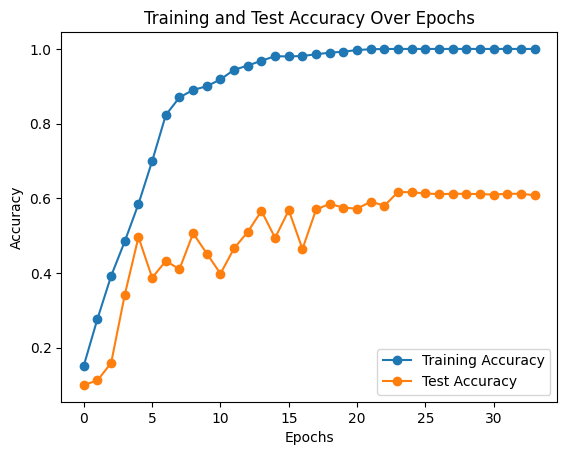

In [ ]:
#plot train and test accs
plt.figure
plt.plot(train_accs, label='Training Accuracy', marker='o')
plt.plot(test_accs, label='Test Accuracy', marker='o')
# Add title and axis labels
plt.title("Training and Test Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Add a legend to identify the lines
plt.legend()

# Display the plot
plt.show()

<ipython-input-136-4b377dd4fdfe>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("vgg_model.pth"))


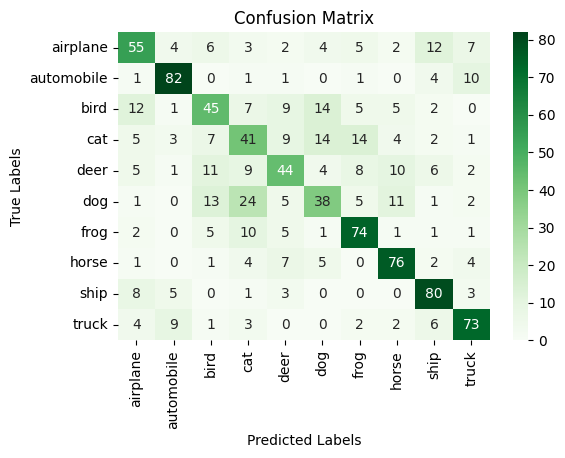

Classification Report:
              precision    recall  f1-score   support

    airplane       0.59      0.55      0.57       100
  automobile       0.78      0.82      0.80       100
        bird       0.51      0.45      0.48       100
         cat       0.40      0.41      0.40       100
        deer       0.52      0.44      0.48       100
         dog       0.47      0.38      0.42       100
        frog       0.65      0.74      0.69       100
       horse       0.68      0.76      0.72       100
        ship       0.69      0.80      0.74       100
       truck       0.71      0.73      0.72       100

    accuracy                           0.61      1000
   macro avg       0.60      0.61      0.60      1000
weighted avg       0.60      0.61      0.60      1000



In [ ]:
#@title VGG11 performance
model =VGGnet()
model.load_state_dict(torch.load("vgg_model.pth"))
model=model.to(device)
model.eval()
# Wrap the test_subset in a DataLoader to get batches as PyTorch tensors.
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)  # Using the same batch size as training
# 3. Make predictions
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 4. Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
# 5. Plot confusion matrix with Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=test_normalized .classes, yticklabels=test_normalized .classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 6. Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=test_normalized .classes))

In [ ]:
#print classification metrics
print_classification_metrics(all_labels, all_preds, average='macro')

Accuracy:  0.6080
Precision: 0.5995
Recall:    0.6080
F1-score:  0.6017


## Experiment with different layers



### Shallower model

In [ ]:
#@title Model adjusted with 4 conv layers and a single fc layer

class VGGnet_small(torch.nn.Module):
  """
  Shallow VGG11 implementation class with 4 conv layers and a single fully connected layer.

  """

  def __init__(self):
    super(VGGnet_small, self).__init__()
    self.conv_layers = torch.nn.Sequential(

            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size= 3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size= 3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 512, kernel_size= 3, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
    )


    #calculate conv output size
    dummy_input = torch.randn(2, 3, 32, 32)
    dummy_output = self.conv_layers(dummy_input)
    conv_output_size = dummy_output.view(dummy_output.size(0), -1).size(1)

    self.fc_layers = torch.nn.Sequential(
          nn.Linear( conv_output_size, 10),
    )

  def forward(self, x):
    x = self.conv_layers(x)
    x = x.view(x.size(0), -1)
    x = self.fc_layers(x)
    return x


In [ ]:
VGG_small = VGGnet_small().to(device)

summary(VGG_small, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         MaxPool2d-4           [-1, 32, 16, 16]               0
            Conv2d-5             [-1, 64, 8, 8]          18,496
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
         MaxPool2d-8             [-1, 64, 4, 4]               0
            Conv2d-9            [-1, 128, 4, 4]          73,856
      BatchNorm2d-10            [-1, 128, 4, 4]             256
             ReLU-11            [-1, 128, 4, 4]               0
        MaxPool2d-12            [-1, 128, 2, 2]               0
           Conv2d-13            [-1, 512, 1, 1]         590,336
      BatchNorm2d-14            [-1, 51

In [ ]:
#@title hyperparameter tuning
# Hyperparameter search
batch_sizes = [128, 256, 512]
learning_rates = [0.01, 0.001, 0.0001]

results, best_hyperparams, best_test_acc = hyperparameter_search(
    model_class=VGGnet_small,
    train_subset=train_subset,
    test_subset=test_subset,
    batch_sizes=batch_sizes,
    learning_rates=learning_rates,
    epochs=100,
    momentum=0.9,
    weight_decay=0.0005,
    patience=10
)

print(f"Best Hyperparameters: {best_hyperparams}")
print(f"Best Test Accuracy: {best_test_acc*100:.2f}%")

Training with batch size: 128 and learning rate: 0.01
Epoch 10, training accuracy: 89.04%, test accuracy: 53.90%
Epoch 20, training accuracy: 96.24%, test accuracy: 56.90%
Early stopping triggered at epoch 22. Best test accuracy: 57.60%
Finished training with batch size 128, learning rate 0.01. Final test accuracy: 54.30%

Training with batch size: 128 and learning rate: 0.001
Epoch 10, training accuracy: 74.20%, test accuracy: 53.30%
Epoch 20, training accuracy: 94.00%, test accuracy: 54.60%
Epoch 30, training accuracy: 99.44%, test accuracy: 54.30%
Early stopping triggered at epoch 32. Best test accuracy: 55.80%
Finished training with batch size 128, learning rate 0.001. Final test accuracy: 54.70%

Training with batch size: 128 and learning rate: 0.0001
Epoch 10, training accuracy: 40.30%, test accuracy: 37.40%
Epoch 20, training accuracy: 48.48%, test accuracy: 41.70%
Epoch 30, training accuracy: 53.76%, test accuracy: 43.50%
Epoch 40, training accuracy: 58.58%, test accuracy: 45.1

In [ ]:
#@title train with best lr and batchsize
VGG_small = VGGnet_small().to(device)
batch_size=256
learning_rate=0.01

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

train_accs, test_accs = train_vgg(VGG_small, train_loader, test_loader, epochs=100, lr=learning_rate, momentum=0.9, weight_decay=0.0005)

Epoch 10, training accuracy: 98.66%, test accuracy: 55.50%
Epoch 20, training accuracy: 100.00%, test accuracy: 57.60%
Early stopping triggered at epoch 22. Best test accuracy: 58.60%


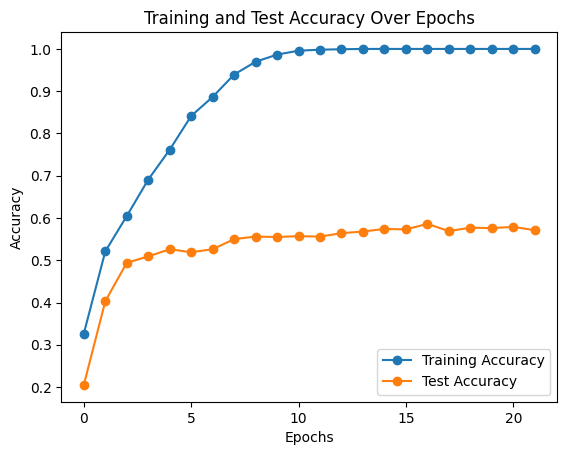

In [ ]:
#plot train and test accs
plt.figure
plt.plot(train_accs, label='Training Accuracy', marker='o')
plt.plot(test_accs, label='Test Accuracy', marker='o')
# Add title and axis labels
plt.title("Training and Test Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Add a legend to identify the lines
plt.legend()

# Display the plot
plt.show()

In [ ]:
#save model
torch.save(VGG_small.state_dict(), 'vgg_small_model.pth')

<ipython-input-197-0a516057fd35>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("vgg_small_model.pth"))


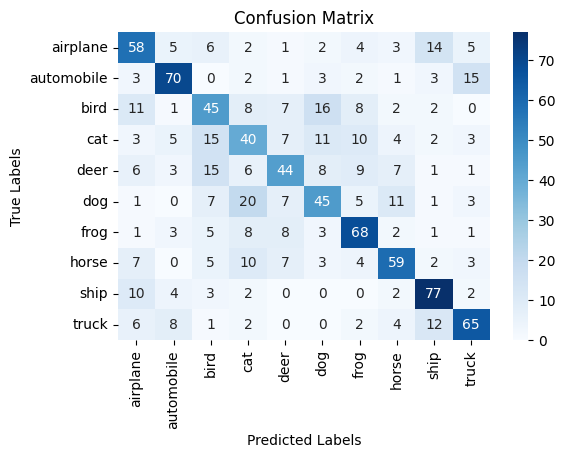

Classification Report:
              precision    recall  f1-score   support

    airplane       0.55      0.58      0.56       100
  automobile       0.71      0.70      0.70       100
        bird       0.44      0.45      0.45       100
         cat       0.40      0.40      0.40       100
        deer       0.54      0.44      0.48       100
         dog       0.49      0.45      0.47       100
        frog       0.61      0.68      0.64       100
       horse       0.62      0.59      0.61       100
        ship       0.67      0.77      0.72       100
       truck       0.66      0.65      0.66       100

    accuracy                           0.57      1000
   macro avg       0.57      0.57      0.57      1000
weighted avg       0.57      0.57      0.57      1000



In [ ]:
#@title VGGsmall performance
model =VGGnet_small()
model.load_state_dict(torch.load("vgg_small_model.pth"))
model=model.to(device)
model.eval()
# Wrap the test_subset in a DataLoader to get batches as PyTorch tensors.
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)  # Using the same batch size as training
# 3. Make predictions
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 4. Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
# 5. Plot confusion matrix with Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_normalized .classes, yticklabels=test_normalized .classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 6. Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=test_normalized .classes))

In [ ]:
#print metrics
print_classification_metrics(all_labels, all_preds, average='macro')

Accuracy:  0.5710
Precision: 0.5688
Recall:    0.5710
F1-score:  0.5686


### Larger model

In [ ]:
#@title Define VGG Model with 3 extra conv layers

class VGGnet_bigger(torch.nn.Module):
  def __init__(self):
    super( VGGnet_bigger, self).__init__()
    self.conv_layers = torch.nn.Sequential(
    #conv1
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    #conv2
    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    #conv3
    nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(64),
    #conv4
    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    #conv5
    nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(128),
    #conv6
    nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(128),
    #conv7
    nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    #conv8
    nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    #conv9
    nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(512),
    #conv10
    nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(512),
    nn.ReLU(),
    #conv11
    nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(512),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    #conv12
    nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(512),
    nn.ReLU(),
    #conv13
    nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(512),
    #conv14
    nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(512),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 2, stride = 2),

    )

    self.fc_layers = torch.nn.Sequential(
    nn.Linear(512 * 1 * 1, 4096), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(4096, 10),
    )

  def forward(self, x):
    x = self.conv_layers(x)
    x = x.view(x.size(0), -1)
    x = self.fc_layers(x)
    return x


In [ ]:
#@title hyperparameter tuning
# Hyperparameter search
batch_sizes = [128, 256, 512]
learning_rates = [0.01, 0.001, 0.0001]

results, best_hyperparams, best_test_acc = hyperparameter_search(
    model_class=VGGnet_bigger,
    train_subset=train_subset,
    test_subset=test_subset,
    batch_sizes=batch_sizes,
    learning_rates=learning_rates,
    epochs=100,
    momentum=0.9,
    weight_decay=0.0005,
    patience=10
)

print(f"Best Hyperparameters: {best_hyperparams}")
print(f"Best Test Accuracy: {best_test_acc*100:.2f}%")

Training with batch size: 128 and learning rate: 0.01
Epoch 10, training accuracy: 77.80%, test accuracy: 55.10%
Epoch 20, training accuracy: 90.16%, test accuracy: 54.30%
Epoch 30, training accuracy: 89.60%, test accuracy: 57.30%
Epoch 40, training accuracy: 95.12%, test accuracy: 62.30%
Epoch 50, training accuracy: 100.00%, test accuracy: 67.20%
Epoch 60, training accuracy: 99.86%, test accuracy: 62.90%
Early stopping triggered at epoch 62. Best test accuracy: 68.00%
Finished training with batch size 128, learning rate 0.01. Final test accuracy: 63.90%

Training with batch size: 128 and learning rate: 0.001
Epoch 10, training accuracy: 80.44%, test accuracy: 51.00%
Epoch 20, training accuracy: 99.12%, test accuracy: 59.80%
Early stopping triggered at epoch 28. Best test accuracy: 62.70%
Finished training with batch size 128, learning rate 0.001. Final test accuracy: 57.10%

Training with batch size: 128 and learning rate: 0.0001
Epoch 10, training accuracy: 29.46%, test accuracy: 33.

In [ ]:
VGG_big = VGGnet_bigger().to(device)

summary(VGG_big, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
            Conv2d-2           [-1, 64, 32, 32]          18,496
       BatchNorm2d-3           [-1, 64, 32, 32]             128
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6           [-1, 64, 16, 16]          36,928
       BatchNorm2d-7           [-1, 64, 16, 16]             128
            Conv2d-8          [-1, 128, 16, 16]          73,856
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
        MaxPool2d-11            [-1, 128, 8, 8]               0
           Conv2d-12            [-1, 128, 8, 8]         147,584
      BatchNorm2d-13            [-1, 128, 8, 8]             256
           Conv2d-14            [-1, 12

In [ ]:
#@title train with best lr and batchsize

batch_size=256
learning_rate=0.01

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

train_accs, test_accs = train_vgg(VGG_big, train_loader, test_loader, epochs=100,
                                  lr=learning_rate,
                                  momentum=0.9, weight_decay=0.0005, patience=20)

Epoch 10, training accuracy: 86.30%, test accuracy: 50.60%
Epoch 20, training accuracy: 98.46%, test accuracy: 56.90%
Epoch 30, training accuracy: 99.72%, test accuracy: 63.70%
Epoch 40, training accuracy: 100.00%, test accuracy: 65.50%
Epoch 50, training accuracy: 100.00%, test accuracy: 65.50%
Epoch 60, training accuracy: 100.00%, test accuracy: 65.60%
Epoch 70, training accuracy: 100.00%, test accuracy: 65.90%
Epoch 80, training accuracy: 100.00%, test accuracy: 65.60%
Early stopping triggered at epoch 89. Best test accuracy: 66.00%


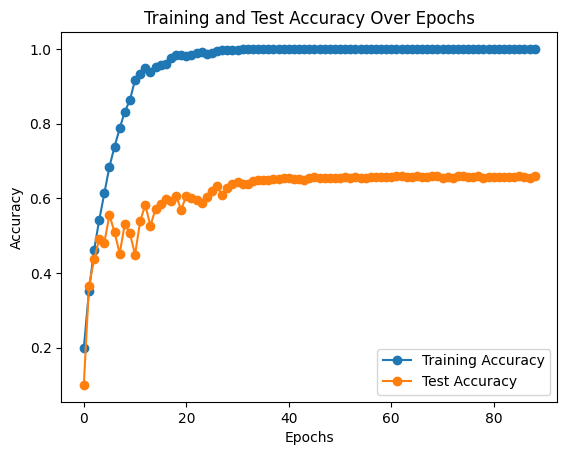

In [ ]:
#plot train and test accs
plt.figure
plt.plot(train_accs, label='Training Accuracy', marker='o')
plt.plot(test_accs, label='Test Accuracy', marker='o')

#add title labels and legend
plt.title("Training and Test Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#save model
torch.save(VGG_big.state_dict(), 'vgg_big_model.pth')

<ipython-input-144-16b736698c7a>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("vgg_big_model.pth"))


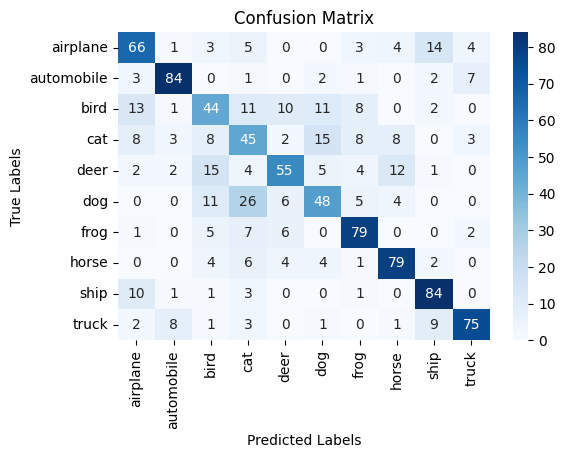

Classification Report:
              precision    recall  f1-score   support

    airplane       0.63      0.66      0.64       100
  automobile       0.84      0.84      0.84       100
        bird       0.48      0.44      0.46       100
         cat       0.41      0.45      0.43       100
        deer       0.66      0.55      0.60       100
         dog       0.56      0.48      0.52       100
        frog       0.72      0.79      0.75       100
       horse       0.73      0.79      0.76       100
        ship       0.74      0.84      0.79       100
       truck       0.82      0.75      0.79       100

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.66      0.66      0.66      1000



In [ ]:
#@title deeper VGG performance
model =VGGnet_bigger()
model.load_state_dict(torch.load("vgg_big_model.pth"))
model=model.to(device)
model.eval()
# Wrap the test_subset in a DataLoader to get batches as PyTorch tensors.
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)  # Using the same batch size as training
# 3. Make predictions
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 4. Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
# 5. Plot confusion matrix with Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_normalized .classes, yticklabels=test_normalized .classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 6. Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=test_normalized .classes))

In [ ]:
#classification metrics
print_classification_metrics(all_labels, all_preds, average='macro')

Accuracy:  0.6590
Precision: 0.6584
Recall:    0.6590
F1-score:  0.6568


3. Adjust the kernel sizes used in your convolutional layers. Experiment with larger kernels (e.g., 5 × 5 or 7
× 7) as well as smaller ones (e.g., 2 × 2 or 3 × 3). Analyze the trade-offs in terms of spatial granularity
versus computational cost and how different kernel sizes influence the recognition of broader features
versus finer details.

## Different kernel sizes

In [ ]:
#@title Data preparation
#resize data to fit larger kernels
# Define the transformation
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

#apply transformation to train and test
train_normalized =datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_normalized = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

#get the subsets again
#get the data
train_subset = Subset(train_normalized, train_indices)
test_subset = Subset(test_normalized, test_indices)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#@title CNN model with different kernel sizes
class VGGnet_kernel_var(torch.nn.Module):

    """
    A version of a VGG implementation with different kernel sizes and 7 conv layers.

    """
    def __init__(self):
        super(VGGnet_kernel_var, self).__init__()
        self.conv_layers = torch.nn.Sequential(
            # conv1
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),  # 64x64 -> 64x64
            # conv2
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),  # Larger kernel size
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 64x64 -> 32x32

            # conv3
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),  # 32x32 -> 32x32
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 32x32 -> 16x16

            # conv4
            nn.Conv2d(128, 256, kernel_size=7, stride=1, padding=3),  # Larger kernel size
            nn.BatchNorm2d(256),
            nn.ReLU(),

            # conv5
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),  # 16x16 -> 16x16
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 16x16 -> 8x8

            # conv6
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),  # 8x8 -> 8x8
            nn.BatchNorm2d(512),
            nn.ReLU(),

            # conv7
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),  # 8x8 -> 8x8
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 8x8 -> 4x4

            # conv8
            nn.Conv2d(512, 512, kernel_size=2, stride=1, padding=1),  # 4x4 -> 4x4
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 4x4 -> 2x2
        )

        # Input size for the fully connected layer
        self.fc_layers = torch.nn.Sequential(
            nn.Linear(512 * 2 * 2, 4096),  # Flattened size is 512 * 2 * 2
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 10),  # 10 classes for classification
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Flatten the feature map
        x = self.fc_layers(x)
        return x


In [ ]:
#@title hyperparameter tuning
# Hyperparameter search
batch_sizes = [128, 256, 512]
learning_rates = [0.01, 0.001, 0.0001]

results, best_hyperparams, best_test_acc = hyperparameter_search(
    model_class=VGGnet_kernel_var,
    train_subset=train_subset,
    test_subset=test_subset,
    batch_sizes=batch_sizes,
    learning_rates=learning_rates,
    epochs=100,
    momentum=0.9,
    weight_decay=0.0005,
    patience=10
)

print(f"Best Hyperparameters: {best_hyperparams}")
print(f"Best Test Accuracy: {best_test_acc*100:.2f}%")

Training with batch size: 128 and learning rate: 0.01
Epoch 10, training accuracy: 72.60%, test accuracy: 55.00%
Epoch 20, training accuracy: 93.38%, test accuracy: 58.90%
Epoch 30, training accuracy: 99.74%, test accuracy: 70.60%
Epoch 40, training accuracy: 92.26%, test accuracy: 60.70%
Early stopping triggered at epoch 40. Best test accuracy: 70.60%
Finished training with batch size 128, learning rate 0.01. Final test accuracy: 60.70%

Training with batch size: 128 and learning rate: 0.001
Epoch 10, training accuracy: 62.38%, test accuracy: 52.70%
Epoch 20, training accuracy: 97.10%, test accuracy: 60.70%
Epoch 30, training accuracy: 94.60%, test accuracy: 57.60%
Epoch 40, training accuracy: 93.20%, test accuracy: 58.90%
Early stopping triggered at epoch 41. Best test accuracy: 63.90%
Finished training with batch size 128, learning rate 0.001. Final test accuracy: 61.60%

Training with batch size: 128 and learning rate: 0.0001
Epoch 10, training accuracy: 30.42%, test accuracy: 34.6

In [ ]:
VGG_var = VGGnet_kernel_var().to(device)

summary(VGG_var, input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             896
            Conv2d-2           [-1, 64, 64, 64]          51,264
       BatchNorm2d-3           [-1, 64, 64, 64]             128
              ReLU-4           [-1, 64, 64, 64]               0
         MaxPool2d-5           [-1, 64, 32, 32]               0
            Conv2d-6          [-1, 128, 32, 32]          73,856
       BatchNorm2d-7          [-1, 128, 32, 32]             256
              ReLU-8          [-1, 128, 32, 32]               0
         MaxPool2d-9          [-1, 128, 16, 16]               0
           Conv2d-10          [-1, 256, 16, 16]       1,605,888
      BatchNorm2d-11          [-1, 256, 16, 16]             512
             ReLU-12          [-1, 256, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         590,080
      BatchNorm2d-14          [-1, 256,

In [ ]:
#@title train with best lr and batchsize

batch_size=256
learning_rate=0.01

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

train_accs, test_accs = train_vgg(VGG_var, train_loader, test_loader, epochs=100, lr=learning_rate,
                                  momentum=0.9, weight_decay=0.0005, patience = 10)

Epoch 10, training accuracy: 80.74%, test accuracy: 49.00%
Epoch 20, training accuracy: 99.04%, test accuracy: 62.90%
Epoch 30, training accuracy: 99.98%, test accuracy: 65.90%
Epoch 40, training accuracy: 100.00%, test accuracy: 68.80%
Early stopping triggered at epoch 46. Best test accuracy: 69.50%


In [ ]:
#saved model
torch.save(VGG_var.state_dict(), 'vgg_var_model.pth')

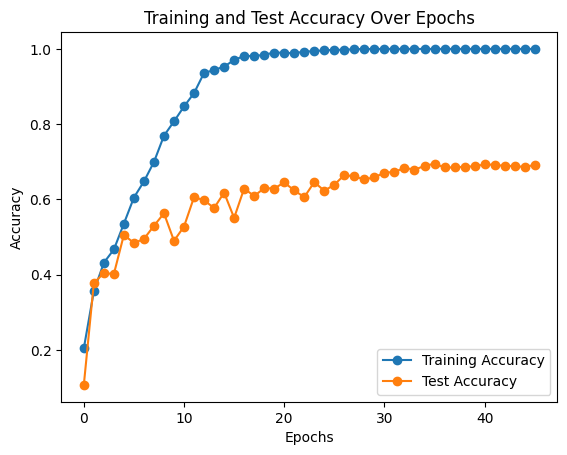

In [ ]:
#plot train and test accs
plt.figure()
plt.plot(train_accs, label='Training Accuracy', marker='o')
plt.plot(test_accs, label='Test Accuracy', marker='o')
# Add title and axis labels
plt.title("Training and Test Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Add a legend to identify the lines
plt.legend()

# Display the plot
plt.show()

### Evaluation

<ipython-input-84-7404961b36d9>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("vgg_var_model.pth"))


Files already downloaded and verified


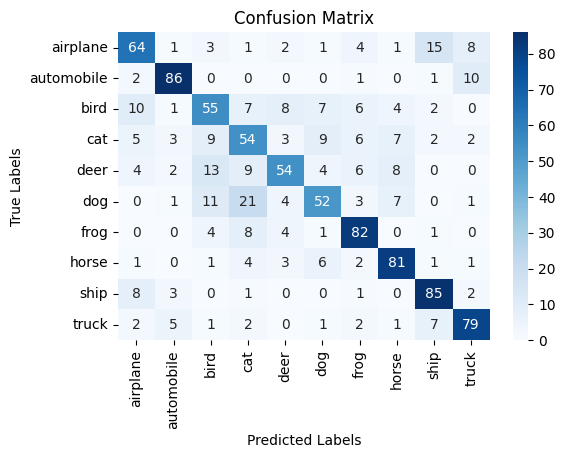

Classification Report:
              precision    recall  f1-score   support

    airplane       0.67      0.64      0.65       100
  automobile       0.84      0.86      0.85       100
        bird       0.57      0.55      0.56       100
         cat       0.50      0.54      0.52       100
        deer       0.69      0.54      0.61       100
         dog       0.64      0.52      0.57       100
        frog       0.73      0.82      0.77       100
       horse       0.74      0.81      0.78       100
        ship       0.75      0.85      0.79       100
       truck       0.77      0.79      0.78       100

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000



In [ ]:
#evaluate CNN
#load models, make predictions and plot confusion matrix and classificaiton report.
model =VGGnet_kernel_var()
model.load_state_dict(torch.load("vgg_var_model.pth"))
model=model.to(device)
model.eval()

# 2. Prepare the test dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)
test_subset = Subset(test_dataset, test_indices)
test_loader = DataLoader(test_subset, batch_size=64, shuffle=False)



# 3. Make predictions
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.cuda()  # If using GPU
        labels = labels.cuda()  # If using GPU
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 4. Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
# 5. Plot confusion matrix with Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 6. Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))

In [ ]:
#classification metrics
print_classification_metrics(all_labels, all_preds, average='macro')

Accuracy:  0.6920
Precision: 0.6897
Recall:    0.6920
F1-score:  0.6884
